<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline


# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = ваш балл + котобонус

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [2]:
%pip install pandas numpy matplotlib seaborn ydata-profiling setuptools ipywidgets scikit-learn joblib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from ydata_profiling import ProfileReport
from IPython.display import display
from sklearn.model_selection import train_test_split

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Для воспроизводимости результатов.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков
- Визуализации признаков и их анализ

Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков**

In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [5]:
print("10 случайных строк тренировочного датасета:")
display(df_train.sample(10))

print("Первые 5 объектов тестового датасета:")
display(df_test.head(5))

print("Последние 5 объектов тестового датасета:")
display(df_test.tail(5))

missing_columns = df_train.columns[df_train.isnull().any()].tolist()
print("Колонки c пропусками:", missing_columns)

duplicates = df_train.duplicated().sum()
print(f"Количество дубликатов в тренировочном датасете: {duplicates}")

10 случайных строк тренировочного датасета:


name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   

       engine  max_power                 torque  seats  
6565   999 CC     67 bhp          91Nm@ 4250rpm    5.0  
2943   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0  
2024  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0  
263   1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0  
4586  1896 CC     90 bhp  21.4@ 1,900(kgm@ rpm)    5.0  
4479  1373 CC   91.1 bhp         130Nm@ 4000rpm    5.0  
4881  1197 CC  81.86 bhp      113.75nm@ 4000rpm    5.0  
3583  1498 CC  89.84 bhp    204Nm@ 2000-2750rpm    5.0  
6361  1396 CC  105.5 bhp       135.3Nm@ 5000rpm    5.0  
4108  1197 CC  81.83 bhp       114.7Nm@ 4000rpm    5.0

Первые 5 объектов тестового датасета:


name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

Последние 5 объектов тестового датасета:


name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

Колонки c пропусками: ['mileage', 'engine', 'max_power', 'torque', 'seats']
Количество дубликатов в тренировочном датасете: 985


In [6]:
profile = ProfileReport(df_train, title="Cars Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [7]:
def clean_and_convert_column(df, column, pattern):
    df[column] = df[column].str.replace(pattern, "", regex=True)
    df[column] = pd.to_numeric(df[column])
    return df

columns_to_clean = [
    {"column": "mileage", "pattern": r" kmpl| km/kg"},
    {"column": "engine", "pattern": r" CC"},
    {"column": "max_power", "pattern": r" bhp"},
]

for col_info in columns_to_clean:
    df_train = clean_and_convert_column(df_train, col_info["column"], col_info["pattern"])
    df_test = clean_and_convert_column(df_test, col_info["column"], col_info["pattern"])

df_train.drop(columns=["torque"], inplace=True)
df_test.drop(columns=["torque"], inplace=True)

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [8]:
print("Количество пропусков в тренировочном наборе до заполнения:")
print(df_train.isnull().sum().sum())

print("Количество пропусков в тестовом наборе до заполнения:")
print(df_test.isnull().sum().sum())

medians = df_train.median(numeric_only=True)

df_train.fillna(medians, inplace=True)

df_test.fillna(medians, inplace=True)

print("Количество пропусков в тренировочном наборе после заполнения:")
print(df_train.isnull().sum().sum())

print("Количество пропусков в тестовом наборе после заполнения:")
print(df_test.isnull().sum().sum())

Количество пропусков в тренировочном наборе до заполнения:
803
Количество пропусков в тестовом наборе до заполнения:
76
Количество пропусков в тренировочном наборе после заполнения:
0
Количество пропусков в тестовом наборе после заполнения:
0


### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [9]:
duplicate_features = df_train.drop(columns=['selling_price']).duplicated()
duplicates_count = duplicate_features.sum()

print(f"Количество объектов с одинаковым признаковым описанием: {duplicates_count}")

duplicate_rows = df_train[duplicate_features]
display(duplicate_rows)

df_train = df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price']), keep='first')

display(df_train)

df_train.reset_index(drop=True, inplace=True)

display(df_train)

Количество объектов с одинаковым признаковым описанием: 1159


name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner  mileage  \
254       35000  Petrol  Individual       Manual   First Owner    18.90   
258       50000  Petrol  Individual       Manual  Second Owner    18.60   
268       70000  Petrol  Individual       Manual  Second Owner    19.10   
324        9000  Diesel      Dealer    Automatic   First Owner    13.60   
325       20000  Petrol      Dealer    Automatic   First Owner    22.37   
...         ...     ...         ...          ...           ...      ...   
6947      60000  Petrol  Individual       Manual  Second Owner    18.00   
6984      24000  Diesel  Individual       Manual   First Owner    24.40   
6989      50000  Diesel  Individual       Manual   First Owner    26.59   
6997      25000  Diesel  Individual       Manual   First Owner    23.57   
6998      25000  Diesel  Individual       Manual   First Owner    23.57   

      engine  max_power  seats  
254   1197.0      82.00    5.0  
258   1197.0      85.80    5.0  
268   1197.0      85.80    5.0  
324   1999.0     177.00    5.0  
325   2487.0     214.56    5.0  
...      ...        ...    ...  
6947   995.0      62.00    5.0  
6984  1498.0      98.63    5.0  
6989  1248.0      74.00    5.0  
6997  1396.0      70.00    5.0  
6998  1396.0      70.00    5.0  

[1159 rows x 12 columns]

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
6992            Hyundai Santro Xing GLS  2008         120000     191000   
6993  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
6994                  Hyundai i20 Magna  2013         320000     110000   
6995              Hyundai Verna CRDi SX  2007         135000     119000   
6996             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
0     Diesel  Individual       Manual           First Owner    23.40  1248.0   
1     Diesel  Individual       Manual          Second Owner    21.14  1498.0   
2     Diesel  Individual       Manual           First Owner    23.00  1396.0   
3     Petrol  Individual       Manual           First Owner    16.10  1298.0   
4     Petrol  Individual       Manual           First Owner    20.14  1197.0   
...      ...         ...          ...                   ...      ...     ...   
6992  Petrol  Individual       Manual           First Owner    17.92  1086.0   
6993  Petrol  Individual       Manual          Second Owner    18.90   998.0   
6994  Petrol  Individual       Manual           First Owner    18.50  1197.0   
6995  Diesel  Individual       Manual  Fourth & Above Owner    16.80  1493.0   
6996  Diesel  Individual       Manual           First Owner    19.30  1248.0   

      max_power  seats  
0         74.00    5.0  
1        103.52    5.0  
2         90.00    5.0  
3         88.20    5.0  
4         81.86    5.0  
...         ...    ...  
6992      62.10    5.0  
6993      67.10    5.0  
6994      82.85    5.0  
6995     110.00    5.0  
6996      73.90    5.0  

[5840 rows x 12 columns]

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
0     Diesel  Individual       Manual           First Owner    23.40  1248.0   
1     Diesel  Individual       Manual          Second Owner    21.14  1498.0   
2     Diesel  Individual       Manual           First Owner    23.00  1396.0   
3     Petrol  Individual       Manual           First Owner    16.10  1298.0   
4     Petrol  Individual       Manual           First Owner    20.14  1197.0   
...      ...         ...          ...                   ...      ...     ...   
5835  Petrol  Individual       Manual           First Owner    17.92  1086.0   
5836  Petrol  Individual       Manual          Second Owner    18.90   998.0   
5837  Petrol  Individual       Manual           First Owner    18.50  1197.0   
5838  Diesel  Individual       Manual  Fourth & Above Owner    16.80  1493.0   
5839  Diesel  Individual       Manual           First Owner    19.30  1248.0   

      max_power  seats  
0         74.00    5.0  
1        103.52    5.0  
2         90.00    5.0  
3         88.20    5.0  
4         81.86    5.0  
...         ...    ...  
5835      62.10    5.0  
5836      67.10    5.0  
5837      82.85    5.0  
5838     110.00    5.0  
5839      73.90    5.0  

[5840 rows x 12 columns]

In [10]:
assert df_train.shape == (5840, 12)

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [11]:
for col in ['engine', 'seats']:
    df_train[col] = df_train[col].astype(int)
    df_test[col] = df_test[col].astype(int)

print(df_train.dtypes)

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object


/var/folders/71/q0j5nr7j5wj430p__ltbyq140000gn/T/ipykernel_65318/2395074789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[col] = df_train[col].astype(int)
/var/folders/71/q0j5nr7j5wj430p__ltbyq140000gn/T/ipykernel_65318/2395074789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[col] = df_train[col].astype(int)


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [12]:
print("Основные статистики по числовым столбцам из train:")
display(df_train.describe(include=["number"]))

print("Основные статистики по числовым столбцам из test:")
display(df_test.describe(include=["number"]))

print("Основные статистики по категориальным столбцам из train:")
display(df_train.describe(include=["object"]))

print("Основные статистики по категориальным столбцам из test:")
display(df_test.describe(include=["object"]))

Основные статистики по числовым столбцам из train:


year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.428611  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.986026   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.910782     5.426712  
std      31.639585     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000

Основные статистики по числовым столбцам из test:


year  selling_price      km_driven      mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.337480  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.951751   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.000000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.550000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.300000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.300000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.260000  3604.00000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     90.844330     5.403000  
std      34.892709     0.912921  
min      34.200000     4.000000  
25%      69.000000     5.000000  
50%      82.425000     5.000000  
75%     102.000000     5.000000  
max     280.000000     9.000000

Основные статистики по категориальным столбцам из train:


name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

Основные статистики по категориальным столбцам из test:


name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

In [13]:
assert df_train.shape == (5840, 12)

## **Визуализации**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

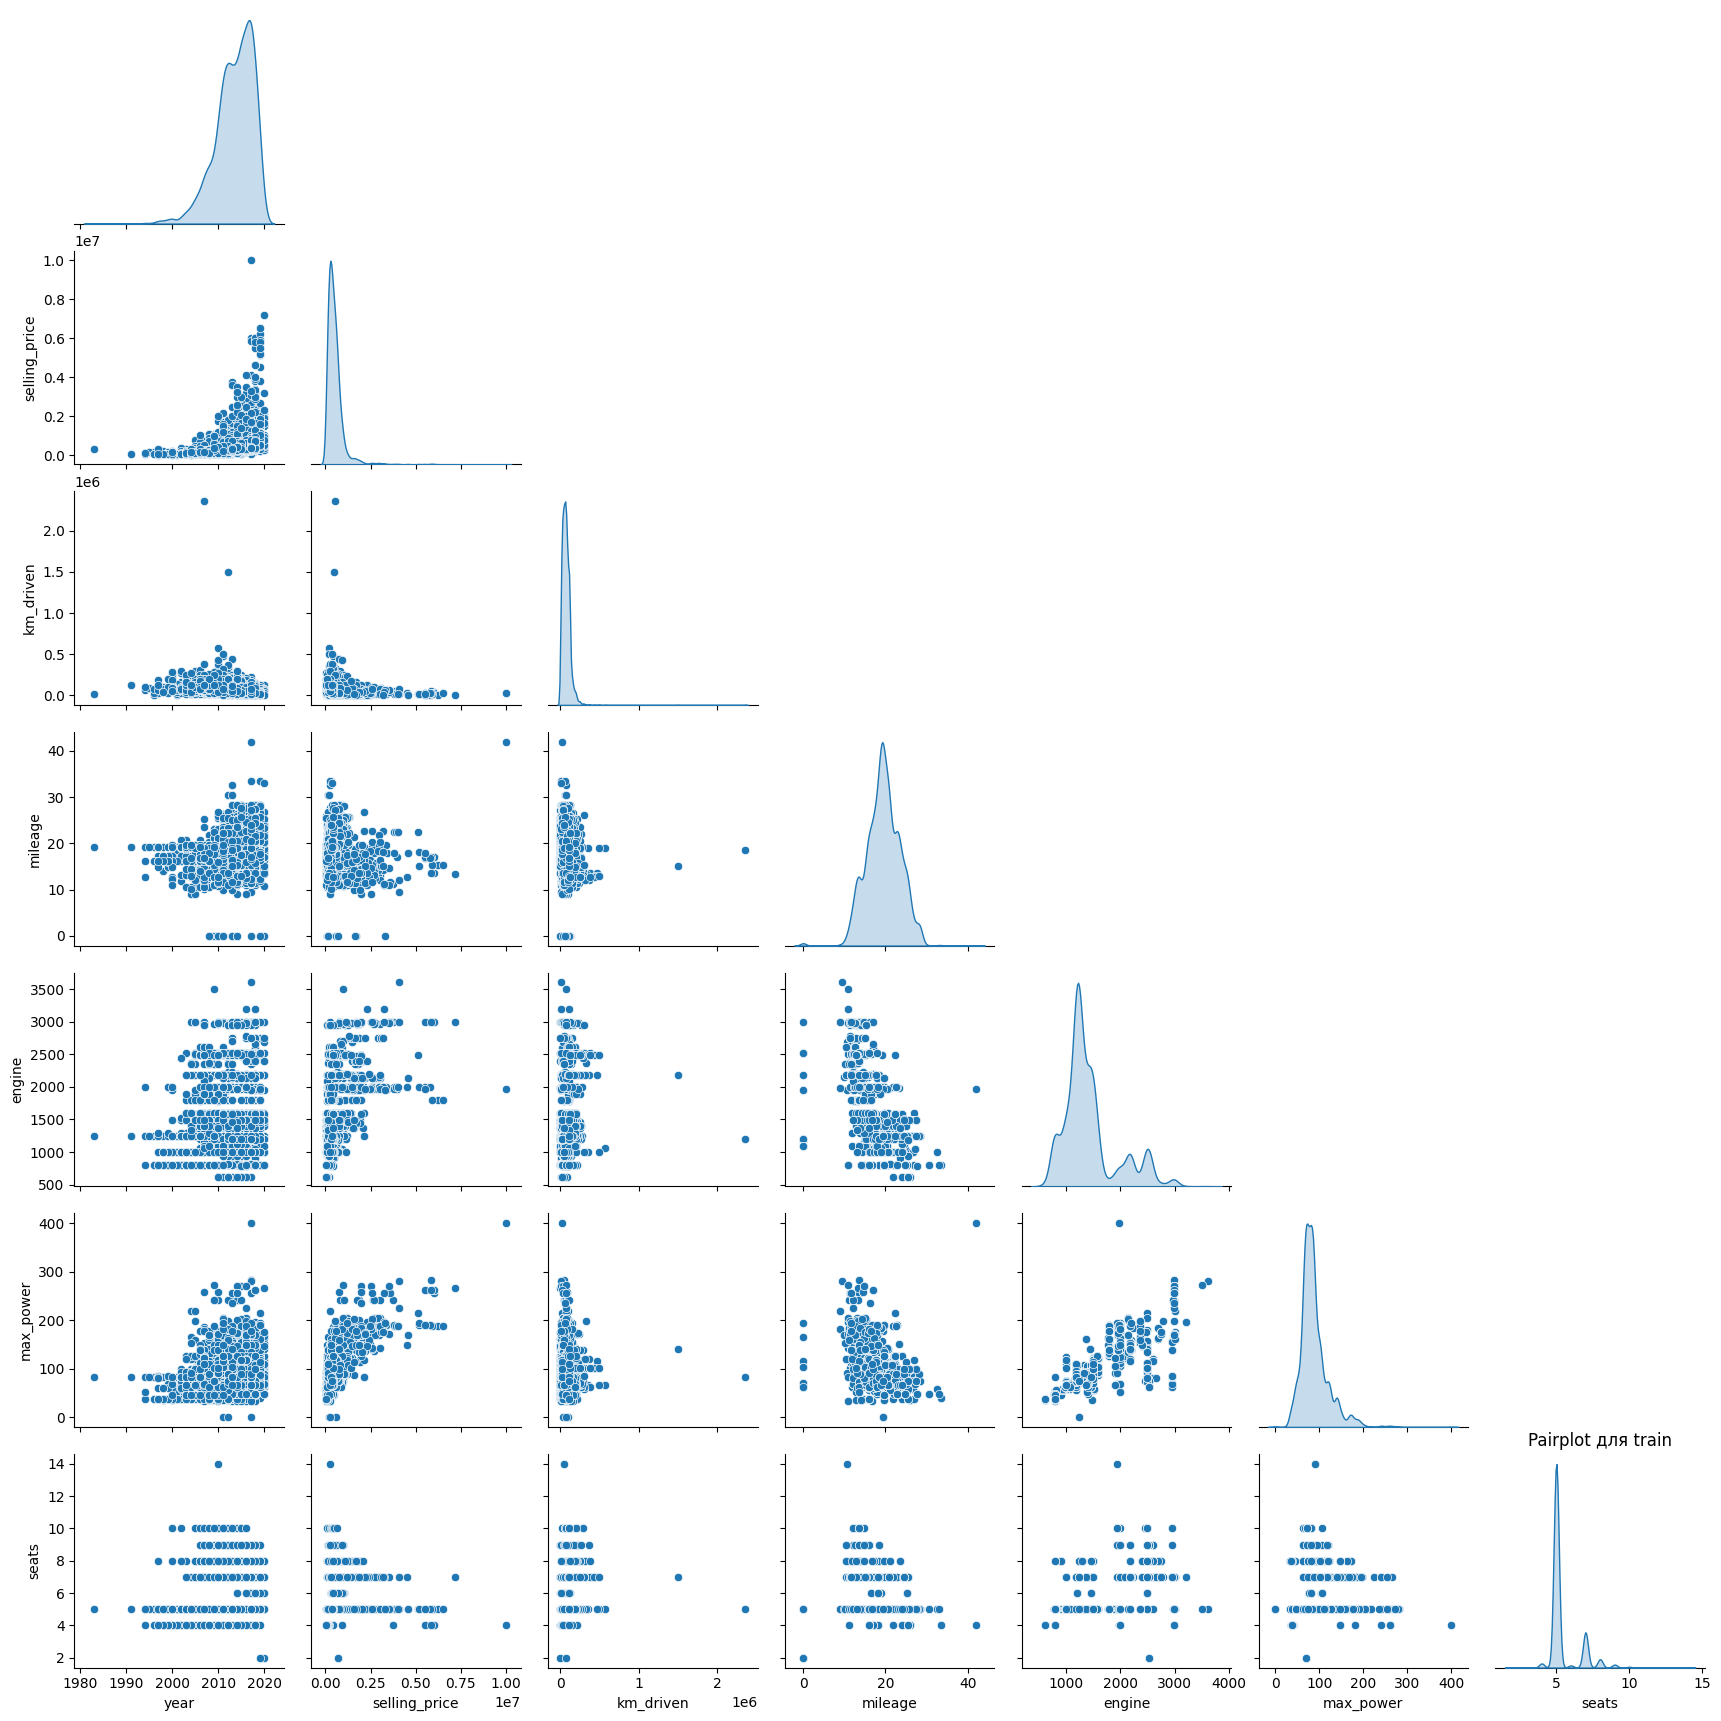

In [14]:
sns.pairplot(df_train, diag_kind="kde", corner=True)
plt.title("Pairplot для train")
plt.show()

Да, можно увидеть связь всех признаков с целевой переменной.

Да, такие гипотезы можно составить, например видна сильная линейная зависимость между engine и max_power.

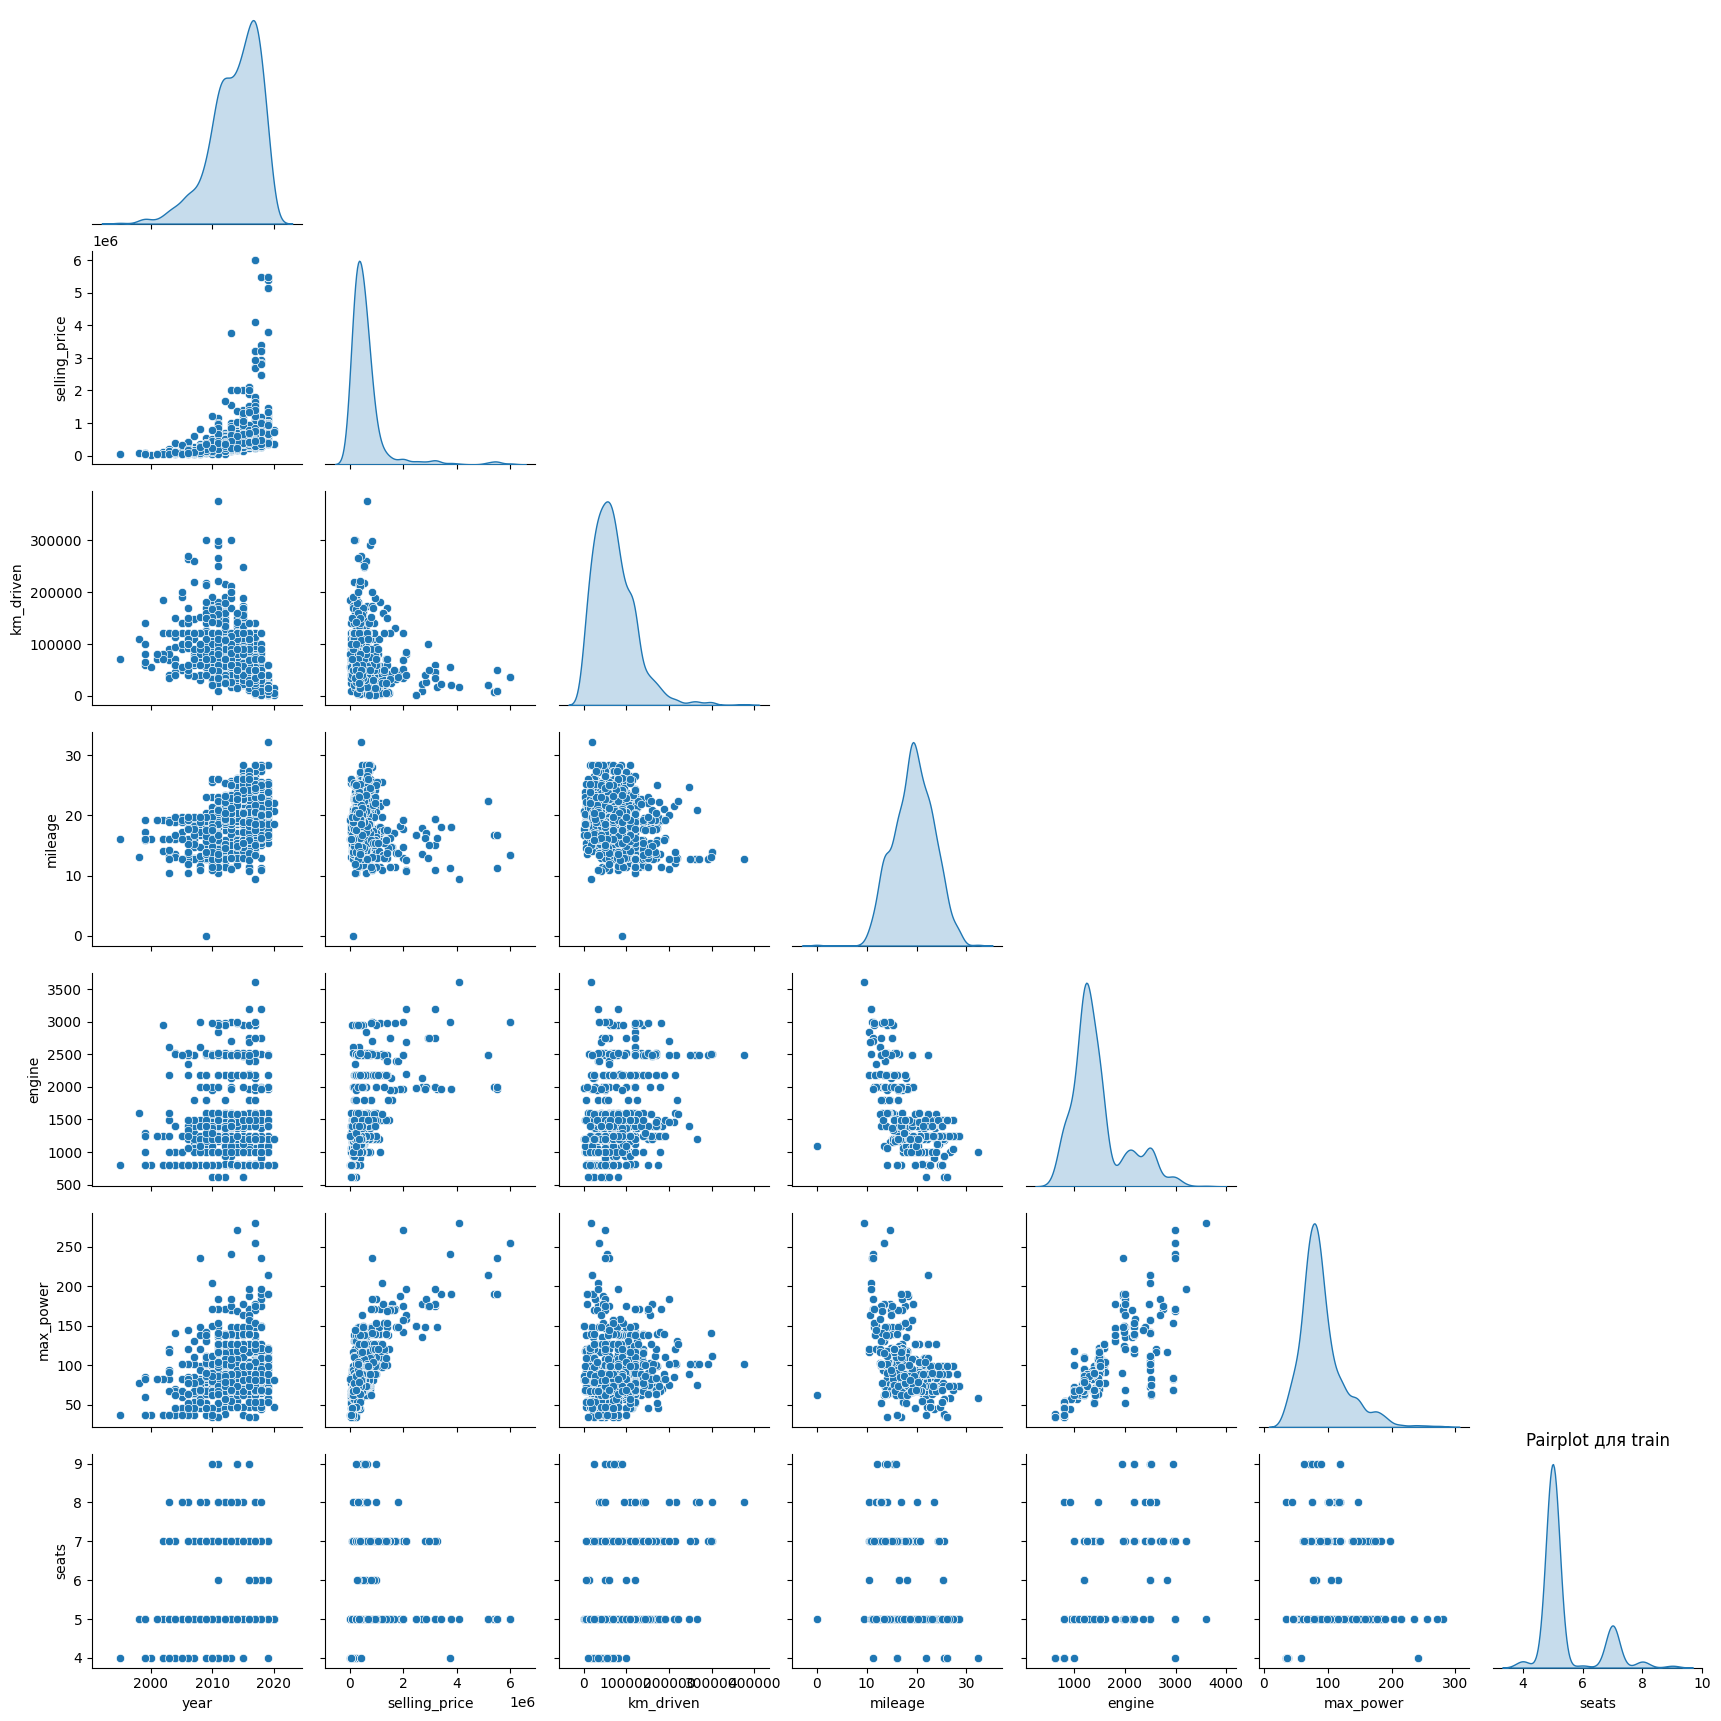

In [15]:
sns.pairplot(df_test, diag_kind="kde", corner=True)
plt.title("Pairplot для train")
plt.show()

Да, зависимости в двух выборках похожи.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


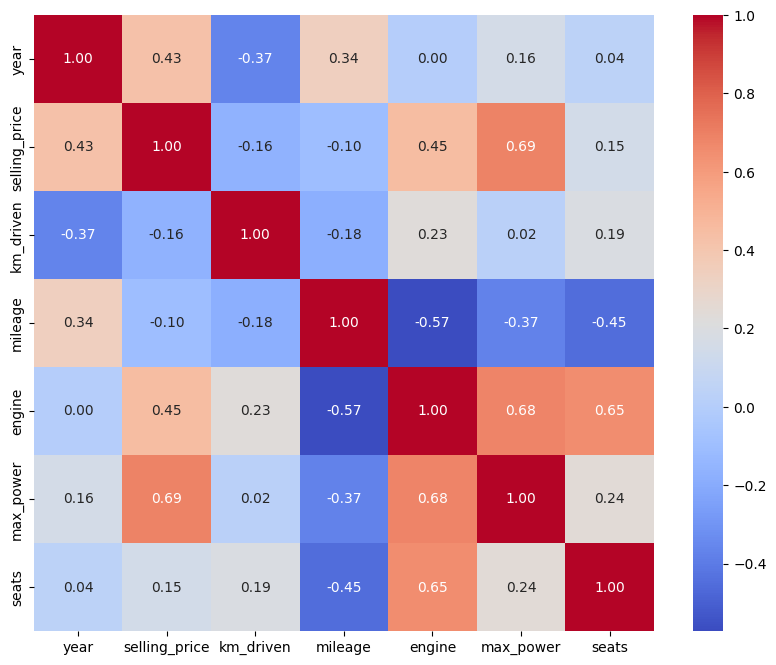

In [16]:
correlation_matrix = df_train.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

year и engine

selling_price и max_power

да

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

Нарисовал кривые сглаженного распределения на pair plot. Видно, что распределения совершенно разные. Например, у seats 2 пика на 5 и 7, но практически нет значений 6.

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.


### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [17]:
X_train = df_train.select_dtypes(include=["number"]).copy()

X_test = df_test.select_dtypes(include=["number"]).copy()

y_train = X_train["selling_price"]
y_test = X_test["selling_price"]

X_train = X_train.drop(columns=["selling_price"])
X_test = X_test.drop(columns=["selling_price"])

display(X_train.head())

year  km_driven  mileage  engine  max_power  seats
0  2014     145500    23.40    1248      74.00      5
1  2014     120000    21.14    1498     103.52      5
2  2010     127000    23.00    1396      90.00      5
3  2007     120000    16.10    1298      88.20      5
4  2017      45000    20.14    1197      81.86      5

In [18]:
assert X_train.shape == (5840, 6)

In [19]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

def calculate_and_print_metrics(y_train, y_train_pred, y_test, y_test_pred):
    r2_train = r2_score(y_train, y_train_pred)
    mse_train = MSE(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mse_test = MSE(y_test, y_test_pred)
    
    print(f"R^2 для тренировочного набора: {r2_train:.3f}")
    print(f"MSE для тренировочного набора: {mse_train:.3f}")
    print(f"R^2 для тестового набора: {r2_test:.3f}")
    print(f"MSE для тестового набора: {mse_test:.3f}")
    
    # return {
    #     "R2_train": r2_train,
    #     "MSE_train": mse_train,
    #     "R2_test": r2_test,
    #     "MSE_test": mse_test,
    # }

linear = LinearRegression()

linear.fit(X_train, y_train)

y_train_pred = linear.predict(X_train)
y_test_pred = linear.predict(X_test)

calculate_and_print_metrics(y_train, y_train_pred, y_test, y_test_pred)

R^2 для тренировочного набора: 0.592
MSE для тренировочного набора: 116873067751.522
R^2 для тестового набора: 0.594
MSE для тестового набора: 233297548204.613


Модель плохо справляется с предсказаниями. Необходимы доработки параметров модели и доработка признаков.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

calculate_and_print_metrics(y_train, y_train_pred, y_test, y_test_pred)

R^2 для тренировочного набора: 0.592
MSE для тренировочного набора: 116873067751.522
R^2 для тестового набора: 0.594
MSE для тестового набора: 233297548204.603


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [23]:
feature_names = df_train.select_dtypes(include=["number"]).columns.drop("selling_price")

most_informative_index = abs(linear_model.coef_).argmax()
most_informative_feature = feature_names[most_informative_index]
most_informative_coef = linear_model.coef_[most_informative_index]

print(f"Наиболее информативный признак {most_informative_feature} с коэффициентом β = {most_informative_coef:.3f}")


Наиболее информативный признак max_power с коэффициентом β = 322779.703


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [24]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(random_state=42)

lasso_model.fit(X_train, y_train)

y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

calculate_and_print_metrics(y_train, y_train_pred, y_test, y_test_pred)

coefficients = lasso_model.coef_

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.1f}")

R^2 для тренировочного набора: 0.592
MSE для тренировочного набора: 116873067761.635
R^2 для тестового набора: 0.594
MSE для тестового набора: 233298219170.760
year: 152843.1
km_driven: -44146.9
mileage: 28779.2
engine: 61172.0
max_power: 322780.6
seats: -23217.7


Возможно, зануление не произошло, так как все признаки слишком значимы, или параметр по умолчанию у модели слишком низкий.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.logspace(-5, 5, 1000)}

grid_search = GridSearchCV(estimator=Lasso(random_state=42, max_iter=100000), param_grid=param_grid, scoring='r2', cv=10, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_lasso_model = grid_search.best_estimator_

best_coefficients = best_lasso_model.coef_

print(f"Лучший параметр: {best_alpha}")

for feature, coef in zip(feature_names, best_coefficients):
    print(f"{feature}: {coef:.3f}")

y_train_pred = best_lasso_model.predict(X_train)
y_test_pred = best_lasso_model.predict(X_test)

calculate_and_print_metrics(y_train, y_train_pred, y_test, y_test_pred)


Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
Лучший параметр: 26880.010215376074
year: 145786.179
km_driven: -15496.653
mileage: 0.000
engine: 0.000
max_power: 321555.595
seats: -0.000
R^2 для тренировочного набора: 0.582
MSE для тренировочного набора: 119679385705.379
R^2 для тестового набора: 0.564
MSE для тестового набора: 250500878910.160


Было обучено 10000 моделей.
Лучший параметр 26880, да, mileage и engine и seats занулились.

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [26]:
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': np.logspace(-3, 3, 1000),
    'l1_ratio': np.linspace(0.1, 1.0, 10)
}

grid_search = GridSearchCV(estimator=ElasticNet(random_state=42, max_iter=100000), param_grid=param_grid, scoring='r2', cv=10, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_l1 = grid_search.best_params_['l1_ratio']
best_elasticnet_model = grid_search.best_estimator_

best_coefficients = best_elasticnet_model.coef_

print(f"Лучший параметр alpha: {best_alpha}")
print(f"Лучший параметр l1: {best_l1}")

for feature, coef in zip(feature_names, best_coefficients):
    print(f"{feature}: {coef:.3f}")

y_train_pred = best_elasticnet_model.predict(X_train)
y_test_pred = best_elasticnet_model.predict(X_test)

calculate_and_print_metrics(y_train, y_train_pred, y_test, y_test_pred)


Fitting 10 folds for each of 10000 candidates, totalling 100000 fits
Лучший параметр alpha: 1.4426439512181572
Лучший параметр l1: 0.9
year: 142755.116
km_driven: -46191.086
mileage: 20619.217
engine: 82193.402
max_power: 268325.057
seats: -23164.744
R^2 для тренировочного набора: 0.585
MSE для тренировочного набора: 118950463683.679
R^2 для тестового набора: 0.563
MSE для тестового набора: 251349295726.717


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [ ]:
# X_train_cat = df_train.select_dtypes(include=["number", "object"]).copy()
# X_test_cat = df_test.select_dtypes(include=["number", "object"]).copy()


# X_train_cat = X_train_cat.drop(columns=["name", "selling_price"])
# X_test_cat = X_test_cat.drop(columns=["name", "selling_price"])

In [28]:
# assert X_train_cat.shape == (5840, 10)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [29]:
X_train_cat = df_train.select_dtypes(include=["number", "object"]).copy()
X_test_cat = df_test.select_dtypes(include=["number", "object"]).copy()

for df in [X_train_cat, X_test_cat]:
    df['brand'] = df['name'].apply(lambda x: x.split()[0])
    df['model'] = df['name'].apply(lambda x: ' '.join(x.split()[1:]))

y_train_cat = X_train_cat["selling_price"]
y_test_cat = X_test_cat["selling_price"]
    
X_train_cat = X_train_cat.drop(columns=["name", "selling_price"])
X_test_cat = X_test_cat.drop(columns=["name", "selling_price"])

In [30]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner   brand            model
count     5840        5840         5840         5840    5840             5840
unique       4           3            2            5      30             1924
top     Diesel  Individual       Manual  First Owner  Maruti  Swift Dzire VDI
freq      3177        5223         5336         3603    1804               91

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [31]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


categorical_features = X_train_cat.select_dtypes(include=['object']).columns.tolist()
categorical_features += ['seats']

numeric_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power']

cat_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
num_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('ohe',    cat_transformer, categorical_features),
        ('scaler', num_transformer, numeric_features)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('encode_and_scale', preprocessor)
])

X_train_transformed = pipeline.fit_transform(X_train_cat)
X_test_transformed  = pipeline.transform(X_test_cat)

X_train_cat = X_train_transformed.toarray()
X_test_cat = X_test_transformed.toarray()

/Users/dory/Documents/HSE/ma_mlds/ml/HW1(Regression with inference)/.venv_hw1_train/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [32]:
print(X_test_cat.shape)
print(X_train_cat.shape)

(1000, 1975)
(5840, 1975)


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': np.logspace(-2, 2, 100),
}

ridge = Ridge(random_state=42, max_iter=10000)

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv=10, n_jobs=-1, verbose=1)

grid_search.fit(X_train_cat, y_train_cat)

best_alpha = grid_search.best_params_['alpha']
best_ridge_model = grid_search.best_estimator_

best_coefficients = best_ridge_model.coef_

print(f"Лучший параметр alpha: {best_alpha}")

y_train_pred = best_ridge_model.predict(X_train_cat)
y_test_pred = best_ridge_model.predict(X_test_cat)

calculate_and_print_metrics(y_train_cat, y_train_pred, y_test_cat, y_test_pred)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Лучший параметр alpha: 0.23644894126454083
R^2 для тренировочного набора: 0.969
MSE для тренировочного набора: 8981828857.456
R^2 для тестового набора: 0.951
MSE для тестового набора: 28421341079.343


# **Часть 4. | Бизнесовая**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [34]:
def business_metric(y_true, y_pred):
    relative_error = np.abs(y_true - y_pred) / y_true
    
    within_10_percent = (relative_error <= 0.1).sum()

    within_10_percent_ration = within_10_percent / len(y_true)
    
    return within_10_percent_ration

def calculate_business_metrics(models, model_names, X_train, y_train, X_test, y_test):
    results = []

    for model, name in zip(models, model_names):
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_metric = business_metric(y_train, y_train_pred)
        test_metric = business_metric(y_test, y_test_pred)
        
        results.append({
            "Model": name,
            "Train Business Metric": train_metric,
            "Test Business Metric": test_metric
        })
    
    return results

In [35]:
models = [best_elasticnet_model, best_lasso_model, lasso_model, linear_model]
model_names = ["Best ElasticNet", "Best Lasso", "Lasso", "Linear Regression"]

metrics_df = calculate_business_metrics(models, model_names, X_train, y_train, X_test, y_test)

y_train_ridge_pred = best_ridge_model.predict(X_train_cat)
y_test_ridge_pred = best_ridge_model.predict(X_test_cat)

train_ridge_metric = business_metric(y_train, y_train_pred)
test_ridge_metric = business_metric(y_test, y_test_pred)

metrics_df.append({
            "Model": "Best Ridge Model",
            "Train Business Metric": train_ridge_metric,
            "Test Business Metric": test_ridge_metric
        })

display(pd.DataFrame(metrics_df))

Model  Train Business Metric  Test Business Metric
0    Best ElasticNet               0.223630                 0.244
1         Best Lasso               0.205479                 0.231
2              Lasso               0.214726                 0.227
3  Linear Regression               0.214726                 0.227
4   Best Ridge Model               0.548630                 0.466

Ridge справился существенно лучше остальных моделей.

# **Часть 5 | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [36]:
from joblib import dump

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', best_ridge_model) 
])

dump(pipeline, 'preprocessor_pipeline_with_model.pkl')

['preprocessor_pipeline_with_model.pkl']

In [39]:
# from fastapi import FastAPI
# from pydantic import BaseModel
# from typing import List

# app = FastAPI()


# class Item(BaseModel):
#     name: str
#     year: int
#     selling_price: int
#     km_driven: int
#     fuel: str
#     seller_type: str
#     transmission: str
#     owner: str
#     mileage: str
#     engine: str
#     max_power: str
#     torque: str
#     seats: float


# class Items(BaseModel):
#     objects: List[Item]


# @app.post("/predict_item")
# def predict_item(item: Item) -> float:
#     return ...


# @app.post("/predict_items")
# def predict_items(items: List[Item]) -> List[float]:
#     return ...


# Решение в отдельном файле.

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>



Кот Сабрины!